In [110]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [111]:
import os, sys

In [112]:
mito_code = '/home/falcon/Development/unet-training/a-fully-supervised-unet/'
weights = os.path.join(mito_code, 'models/jain/weights.675.hdf5')

In [113]:
sys.path.append(mito_code)
import data_management
from data_management import load_stack
from data_management import load_data

import interactive_plot

import metrics
from metrics import statistics
from metrics import confusion_matrix
from metrics import error_distribution
from metrics import error_borders
from metrics import PR_curve

import generator_extended

import unet
from unet import load_model_unet
from unet import predict_net
from unet import get_unet
from unet import train
from unet import execute_predict

In [114]:
import mahotas as mh
from PIL import Image

In [115]:
img_dir = '/home/falcon/Thesis/test-img-newdata1/'
img1 = os.path.join(img_dir, '000000_000000_000003_000000.jpg')

In [116]:
img = mh.imread(img1)
# TODO maybe invert the image
img_inverted = 255 - img

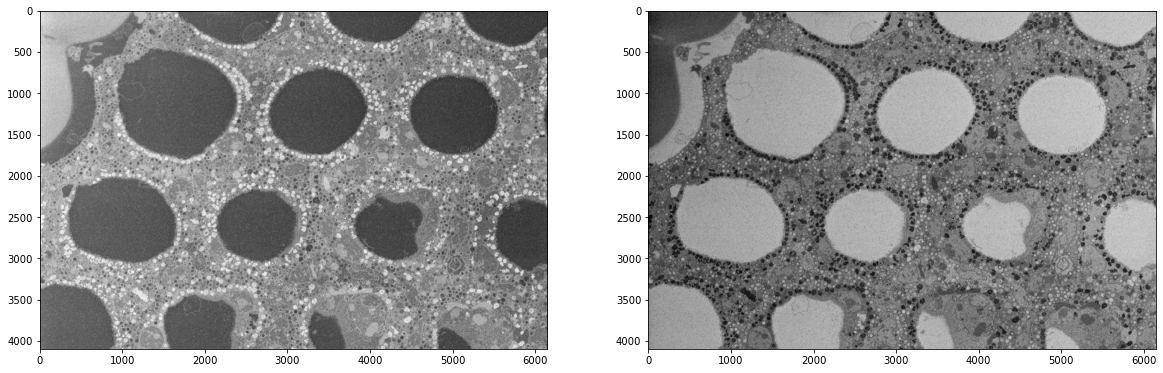

In [117]:
f, images_subplot = plt.subplots(1,2, figsize=(20, 20)) 
images_subplot[0].imshow(img, cmap='gray')
images_subplot[1].imshow(img_inverted, cmap='gray')

In [118]:
# Normalize inverted image
img_inverted_normalized = img_inverted.astype(float)
img_inverted_normalized /= 255

In [119]:
# create copy of normalized image
img_copy = np.zeros((1, img.shape[0], img.shape[1], 1))
img_copy[0,:,:,0] = img_inverted_normalized[:,:]

In [120]:
# create temp image for downsize

# downsize to size
DOWNSIZE_TO = (512, 512)

temp_img = Image.fromarray(img_copy[0, :, :, 0])
temp_img = temp_img.resize((DOWNSIZE_TO[0], DOWNSIZE_TO[1]), resample=Image.NEAREST)

img_inverted_normalized_resized = numpy.asarray(temp_img)

In [121]:
# create copy of resized image
img_copy_resized = np.zeros((1, img_inverted_normalized_resized.shape[0], img_inverted_normalized_resized.shape[1], 1))
img_copy_resized[0,:,:,0] = img_inverted_normalized_resized[:,:]

In [122]:
# load model
model = load_model_unet(weights)

In [123]:
# predict using model
pred = predict_net(model, img_copy_resized)

1/1 [==============================] - 0s 874us/step


In [124]:
# upsize predicted image to original size
pred_img = pred[0,:,:,0]
temp_img = Image.fromarray(pred_img[:, :])
temp_img = temp_img.resize((img.shape[1],img.shape[0]), resample=Image.NEAREST)
predicted_img_resized = np.asarray(temp_img)

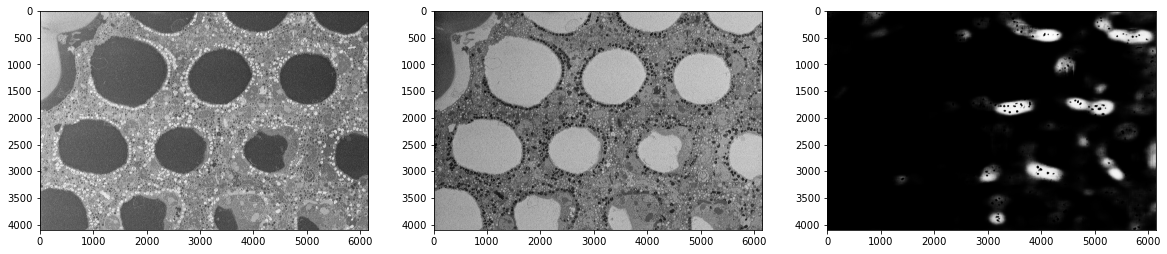

In [125]:
f, images_subplot = plt.subplots(1,3, figsize=(20, 20)) 
images_subplot[0].imshow(img, cmap='gray')
images_subplot[1].imshow(img_inverted, cmap='gray')
images_subplot[2].imshow(predicted_img_resized, cmap='gray')